### RANSAC寻找直线，最小二乘法拟合直线

In [1]:
import numpy as np
from sklearn.linear_model import RANSACRegressor
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

#### 准备直线数据
生成一条线，并加入一些离群点

In [2]:
# 生成一条直线上的一些点（x=y）
n = 100
n_noise = 20
x = np.linspace(-10, 10, n)
y = x.copy()
# 加入一些噪声
x += np.random.normal(0, 0.5, n)
y += np.random.normal(0, 0.5, n)
# 随机加入一些离群点
noise_x = np.random.normal(0, 5, n_noise)
noise_y = np.random.normal(0, 5, n_noise)
x = np.append(x, noise_x)
y = np.append(y, noise_y)
points = np.vstack([x, y]).T

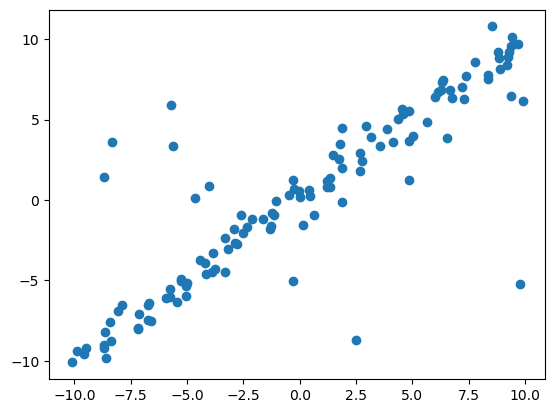

In [3]:
# 可视化数据
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x, y)
plt.show()

#### RANSAC找直线


slope:  0.9694996225121598
intercept:  0.09288853936565167


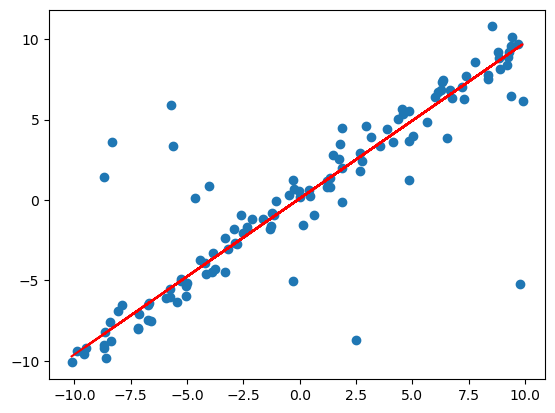

In [4]:
# 使用sklearn自带的RANSAC算法拟合直线
ransac = RANSACRegressor()
ransac.fit(x[:, np.newaxis], y)
slope = ransac.estimator_.coef_[0]
intercept = ransac.estimator_.intercept_
print('slope: ', slope)
print('intercept: ', intercept)

# 可视化拟合结果
plt.scatter(x, y)
plt.plot(x, slope * x + intercept, color='red')
plt.show()

In [5]:
# 手写RANSAC找直线
def fit_line_ransac(points, iterations, threshold):
    best_model = None  # 最佳模型参数
    best_inliers = []  # 最佳内点集合
    max_inliers = 0  # 最大内点数量

    for _ in range(iterations):
        n = len(points)
        # 随机生成0-n-1之间的两个整数
        i1, i2 = random.randint(0, n-1), random.randint(0, n-1)
        while i1 == i2:
            i2 = random.randint(0, n-1)
        p1, p2 = points[i1], points[i2]

        # 计算拟合直线的参数
        x1, y1 = p1
        x2, y2 = p2
        slope = (y2 - y1) / (x2 - x1)
        intercept = y1 - slope * x1

        # 计算其他点到拟合直线的距离，并将距离小于阈值的点定义为内点
        inliers = []
        for point in points:
            x, y = point
            distance = abs(slope * x - y + intercept)
            if distance < threshold:
                inliers.append(point)

        num_inliers = len(inliers)
        if num_inliers > max_inliers:
            best_model = (slope, intercept)
            best_inliers = inliers
            max_inliers = num_inliers

    return best_model, best_inliers


slope:  0.9804372324448515
intercept:  0.1259583872327017


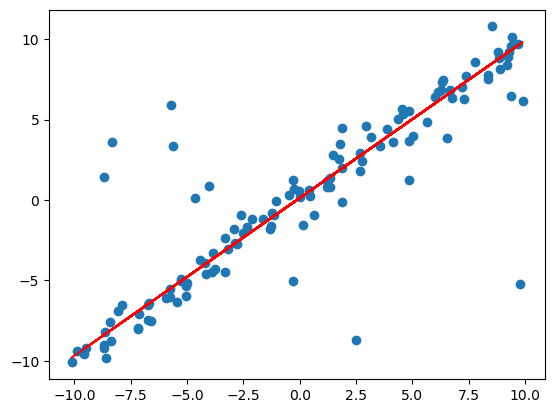

In [6]:
# 使用手写RANSAC算法拟合直线
iterations = 1000  # 迭代次数
threshold = 0.1  # 内点阈值
best_model, best_inliers = fit_line_ransac(points, iterations, threshold)
slope, intercept = best_model
print('slope: ', slope)
print('intercept: ', intercept)

# 可视化拟合结果
plt.scatter(x, y)
plt.plot(x, slope * x + intercept, color='red')
plt.show()

#### 最小二乘拟合直线

斜率: 0.8553603777583766
截距: 0.18236073834335026


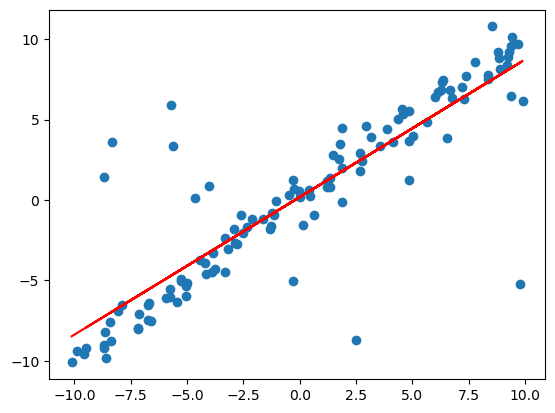

In [7]:
x = points[:,0]
y = points[:,1]
coefficients = np.polyfit(x, y, 1)

# 从系数中提取斜率和截距
slope = coefficients[0]
intercept = coefficients[1]

print("斜率:", slope)
print("截距:", intercept)

# 可视化拟合结果
plt.scatter(x, y)
plt.plot(x, slope * x + intercept, color='red')
plt.show()

In [8]:
# 手写最小二乘法拟合直线
def fit_line_least_squares(points):
    n = len(points)
    x = points[:, 0]
    y = points[:, 1]
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    x2_mean = np.mean(x ** 2)
    xy_mean = np.mean(x * y)
    slope = (xy_mean - x_mean * y_mean) / (x2_mean - x_mean ** 2)
    intercept = y_mean - slope * x_mean
    return slope, intercept

slope:  0.8553603777583766
intercept:  0.18236073834334898


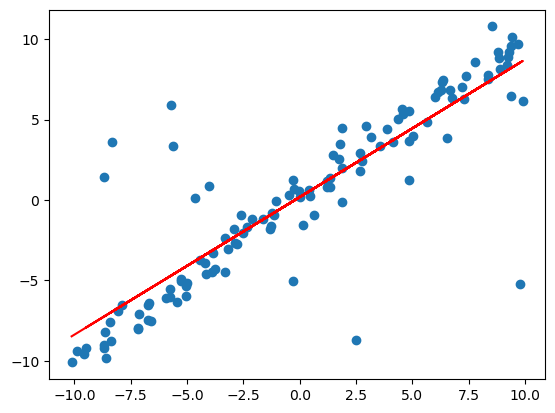

In [9]:
slope, intercept = fit_line_least_squares(points)
print('slope: ', slope)
print('intercept: ', intercept)
# 可视化拟合结果
plt.scatter(x, y)
plt.plot(x, slope * x + intercept, color='red')
plt.show()